---

# **Milestone 2**

## 1 - Perkenalan

```
Nama : Khalisul Akbar

Batch : FTDS-Batch 10
```


### Description



#### Objective :

```
Adapun objective yang ingin dicapai pada project ini adalah :
1. Membuat Model untuk kasus multi-class classification dengan menggunakan 4 algorithma berbeda dan menentukan baseline model yang terbaik.
4. Mampu mengimplementasikan Hyperparameter Tuning untuk mencari parameter terbaik untuk baseline model terpilih.
5. Mampu membuat pipeline model untuk persiapan proses deployment.

```

#### Problem Statement :

```
Beberapa tahapan-tahapan yang harus dilalui pada project ini adalah :
1. Melakukan visualisasi dataset untuk mengetahui gambaran umum dari dataset yang digunakan.
2. Pengecekan dan menghandle outliers dan missing value.
3. Melakukan Feature engineering berupa feature selection, feature scaling, dan feature encoding sebagai proses persiapan data sebelum permodelan.
4. Memingmplementasikan algorithma classifier untuk membuat model yang sesuai dengan objective atau dataset.
5. Melakukan pengetesan model yang telah dibuat dengan data inference.
6. Melakukan model deployment.
```

---

## **Working Area**


## 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

pd.options.mode.chained_assignment = None  # default='warn'

# libbraries for preprocessing and modelling
from category_encoders import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

## 3 - Data Loading

In [2]:
# Load the dataset

df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
# Duplicate the dataset

df_ori = df.copy()

In [4]:
#rename specific column names

df.rename(columns = {'height_cm':'height','weight_kg':'weight','body fat_%':'body_fat', 'gripForce':'grip_force', 'sit and bend forward_cm' : 'sit_and_bend_forward', 'sit-ups counts' : 'sit_ups_counts', 'broad jump_cm' : 'broad_jump'}, inplace = True)

In [5]:
# Check dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   13393 non-null  float64
 1   gender                13393 non-null  object 
 2   height                13393 non-null  float64
 3   weight                13393 non-null  float64
 4   body_fat              13393 non-null  float64
 5   diastolic             13393 non-null  float64
 6   systolic              13393 non-null  float64
 7   grip_force            13393 non-null  float64
 8   sit_and_bend_forward  13393 non-null  float64
 9   sit_ups_counts        13393 non-null  float64
 10  broad_jump            13393 non-null  float64
 11  class                 13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


`Dataset memiliki 13393 baris dan 12 kolom.`

In [6]:
# Chech dataset statistical info

df.describe()

,age,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


`Terlihat ada nilai minimum untuk diastolic, systolic, grip_force, sit_ups_counts, dan broad_jump memiliki nilai 0. Kemungkinan ini merupakan missing values yang terjadi karena user tidak mengikuti salah satu tes tersebut.`

In [7]:
print ('Jumlah baris dengan nilai diastolic 0 : ', df[df['diastolic'] == 0].shape[0])
print ('Jumlah baris dengan nilai systolic 0 : ', df[df['systolic'] == 0].shape[0])
print ('Jumlah baris dengan nilai grip_force 0 : ', df[df['grip_force'] == 0].shape[0])
print ('Jumlah baris dengan nilai sit_ups_counts 0 : ', df[df['sit_ups_counts'] == 0].shape[0])
print ('Jumlah baris dengan nilai broad_jump 0 : ', df[df['broad_jump'] == 0].shape[0])

Jumlah baris dengan nilai diastolic 0 :  1
Jumlah baris dengan nilai systolic 0 :  1
Jumlah baris dengan nilai grip_force 0 :  3
Jumlah baris dengan nilai sit_ups_counts 0 :  125
Jumlah baris dengan nilai broad_jump 0 :  10


In [8]:
df.replace(0,np.nan, inplace=True)

`Total ada 140 baris`

## 4 - Exploratory Data Analysis (EDA)

In [9]:
# Get Numerical Columns and Categorical Columns (original)

num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
print(f'Numerical Columns : {len(num_columns)} columns \n-----------------------------------') 
print(df[num_columns].nunique())

Numerical Columns : 10 columns 
-----------------------------------
age                       44
height                   467
weight                  1398
body_fat                 527
diastolic                 88
systolic                 101
grip_force               549
sit_and_bend_forward     527
sit_ups_counts            80
broad_jump               244
dtype: int64


In [11]:
print(f'Categorical Columns : {len(cat_columns)} columns \n--------------------------------')
for i in cat_columns:
    cat = df[i].unique()
    print(f'{i} ({len(cat)}):',cat)
    print('----------------------------------------')

Categorical Columns : 2 columns 
--------------------------------
gender (2): ['M' 'F']
----------------------------------------
class (4): ['C' 'A' 'B' 'D']
----------------------------------------


`Dataset memiliki 10 kolom numeric dan 2 kolom categorical.`

### 1. Melihat persebaran data setiap kolom numerical

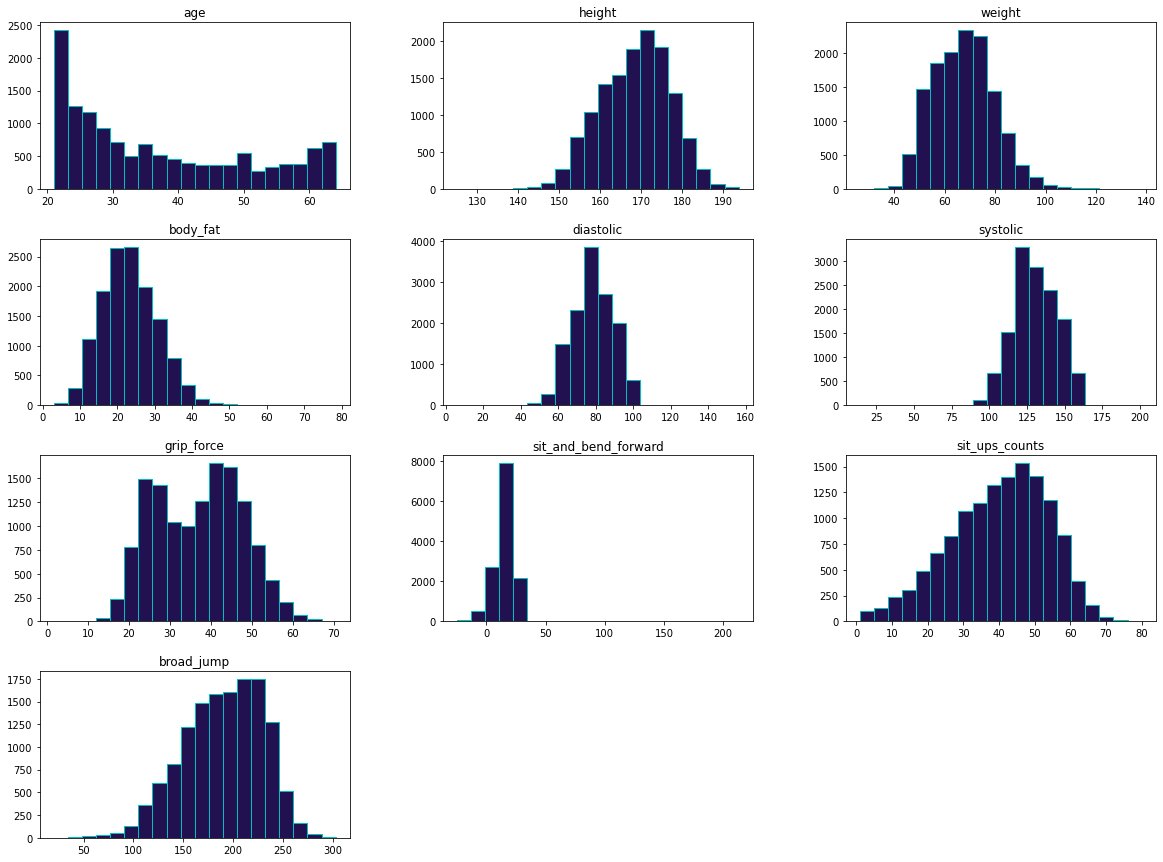

In [12]:
palette = itertools.cycle(sns.color_palette('magma'))

df.hist(bins=20, figsize=(20,15), grid=False, color=next(palette), edgecolor='c')
plt.show()

Dari grafik histogram diatas dapat kita ketahui, bahwa :

1. Data umur user pada dataset berkisar antara 20-65 tahun, dengan umur user yang paling banyak adalah 20-25 tahun.
2. Tinggi user berkisar antara 125-193 cm dengan tinggi user yang paling banyak pada dataset adalah sekitar 170 cm.
3. Weight user pada dataset adalah antara 26-138 kg, dengan weight user yang paling banyak adalah antara 70-75 kg.
4. Data percentase body fat user menunjukkan bahwa user dengan body fat 20-25 persen adalah yang paling mendominasi.
5. diastolic blood pressure rata-rata user adalah 78 dan systolic blood pressure rata-rata user adalah 130.
6. Rata-rata nilai physical test dari user adalah :

                                                - grip_force : 36
                                                - sit_and_bend_forward : 15 cm
                                                - sit_ups 39x
                                                - broad_jump 190 cm

### 2. Melihat Proporsi nilai data dari kolom categorical

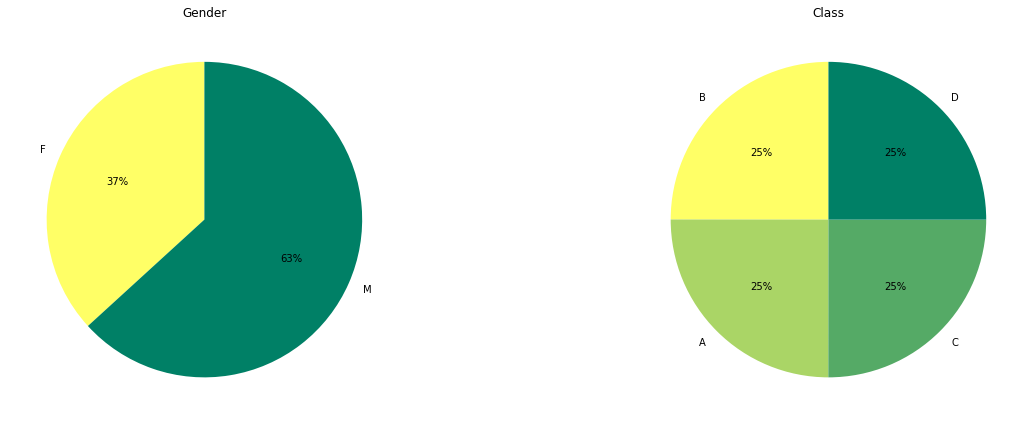

In [13]:
fig, ax = plt.subplots(ncols=2 , figsize=(20,6))
df.groupby("gender")['gender'].count().sort_values().plot(kind='pie', autopct='%.0f%%', ax= ax[0] , ylabel='' , startangle=90, cmap= 'summer_r').set_title ('Gender')
df.groupby("class")['class'].count().sort_values().plot(kind='pie', autopct='%.0f%%', ax= ax[1], ylabel='', startangle=90,cmap= 'summer_r').set_title('Class')
plt.tight_layout()
plt.show()

- Dilihat proporsi gender dari user didominasi oleh Male dengan persentase 63%, sedangkan proporsi Female adalah 37%.
- Jika dilihat dari proporsi class/target dapat disimpulkan bahwa label pada dataset ini Balance dengan proporsi masing-masing class adalah 25%.

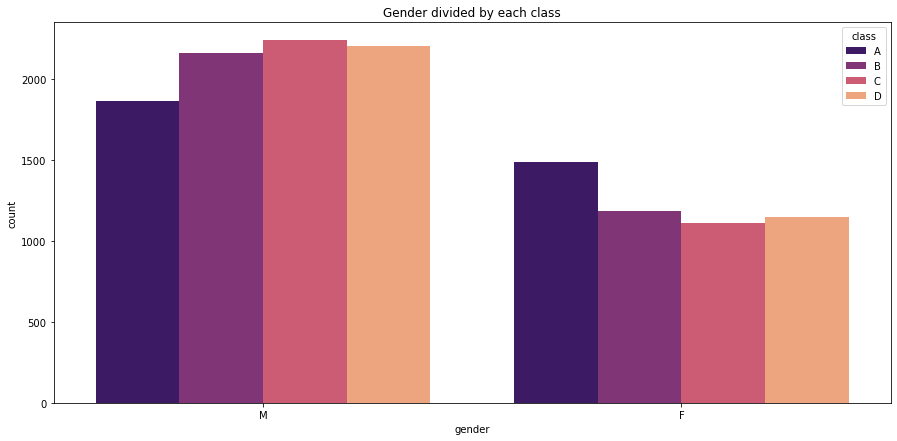

In [14]:
plt.figure(figsize = (15, 7))
sns.countplot(data = df, x='gender', hue=df['class'].sort_values(), palette='magma').set_title('Gender divided by each class')
plt.show()

**Sebagai catatan :**

        - class A = Best
        - class B = Fit
        - class C = normal
        - class D = not good

- Secara overal, kita dapat melihat bahwa jumlah males disetiap class body performance adalah lebih banyak dibandingkan dengan female.
- Namun, jika dilihat berdasarkan gendernya masing-masing, user male terbanyak memiliki kondisi body performance normal dan not good (C dan D). Sedangkan untuk female, user terbanyaknya tergolong kedalam best body performance.

### 3. Melihat hubungan age vs height dan age vs weight

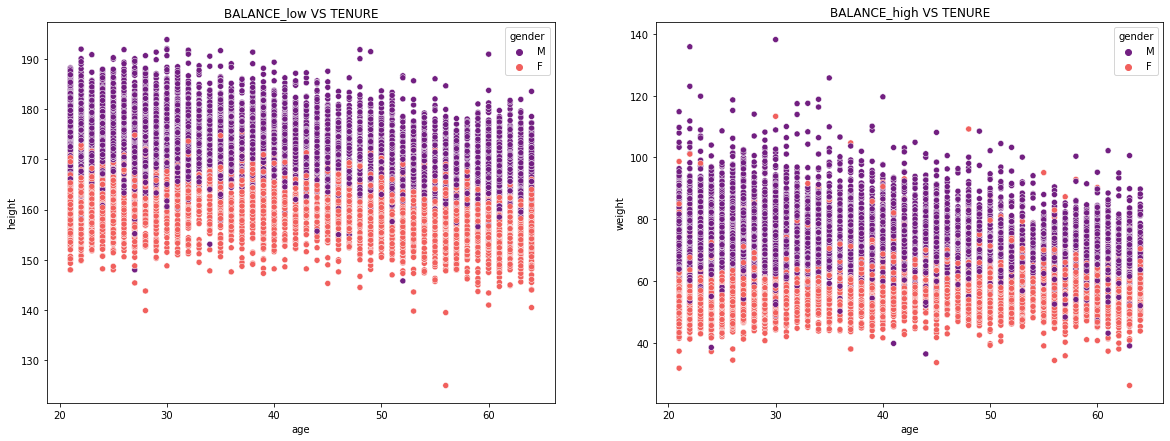

In [15]:
fig, ax =plt.subplots(ncols=2 , figsize=(20,7))
sns.scatterplot(data = df, x='age', y='height', hue=df['gender'].sort_values(), palette='magma', ax=ax[0]).set_title('BALANCE_low VS TENURE')
sns.scatterplot(data = df, x='age', y='weight', hue=df['gender'].sort_values(),  palette='magma', ax=ax[1]).set_title('BALANCE_high VS TENURE')
plt.show()

- Pada grafik age vs height, terlihat tidak ada hubungan yang jelas antara umur user dengan height, akan tetapi jika melihat persebaran data height antara laki-laki dan perempuan maka dapat kita simpulkan bahwa tinggi user laki-laki cenderung lebih tinggi dibandingkan dengan tinggi user para perempuan.
- Hal yang sama juga dapat dilihat pada grafik age vs weight dimana user laki-laki cenderung lebih berat dibandingkan user perempuan.

### 4. Melihat data rata-rata setiap class

In [16]:
class_= df.groupby(['class']).agg({'class' : 'count','age' : 'mean', 'height' : 'mean', 'weight' : 'mean', 'body_fat' : 'mean'})
class_

,class,age,height,weight,body_fat
class,,,,,
A,3348,35.268220,167.871027,64.418178,20.539159
B,3347,37.074096,168.580311,66.612420,22.039981
C,3349,36.699612,169.162168,66.760314,22.644564
D,3349,38.058226,168.625530,71.996948,27.735432


Dari tabel diatas dapat dilihat bahwa :

1. kelas A (BEST) terdiri dari :

                - user berumur rata-rata 35.26 tahun.
                - memiliki tinggi rata-rata 167 tahun.
                - memiliki berat rata-rata 64.4 Kg.
                - memiliki body fat percentage 20.5%.

2. Untuk kelas D (Not GOOD) terdiri dari :

                - user berumur rata-rata 38 tahun.
                - memiliki tinggi rata-rata 168.62 tahun.
                - memiliki berat rata-rata 71.99 Kg.
                - memiliki body fat percentage 27.7%.
              

Jika kita visualisasikan dengan membedakan data CLass berdasarkan gender maka :

In [17]:

class_data = df[['class', 'age','height','weight', 'body_fat']]

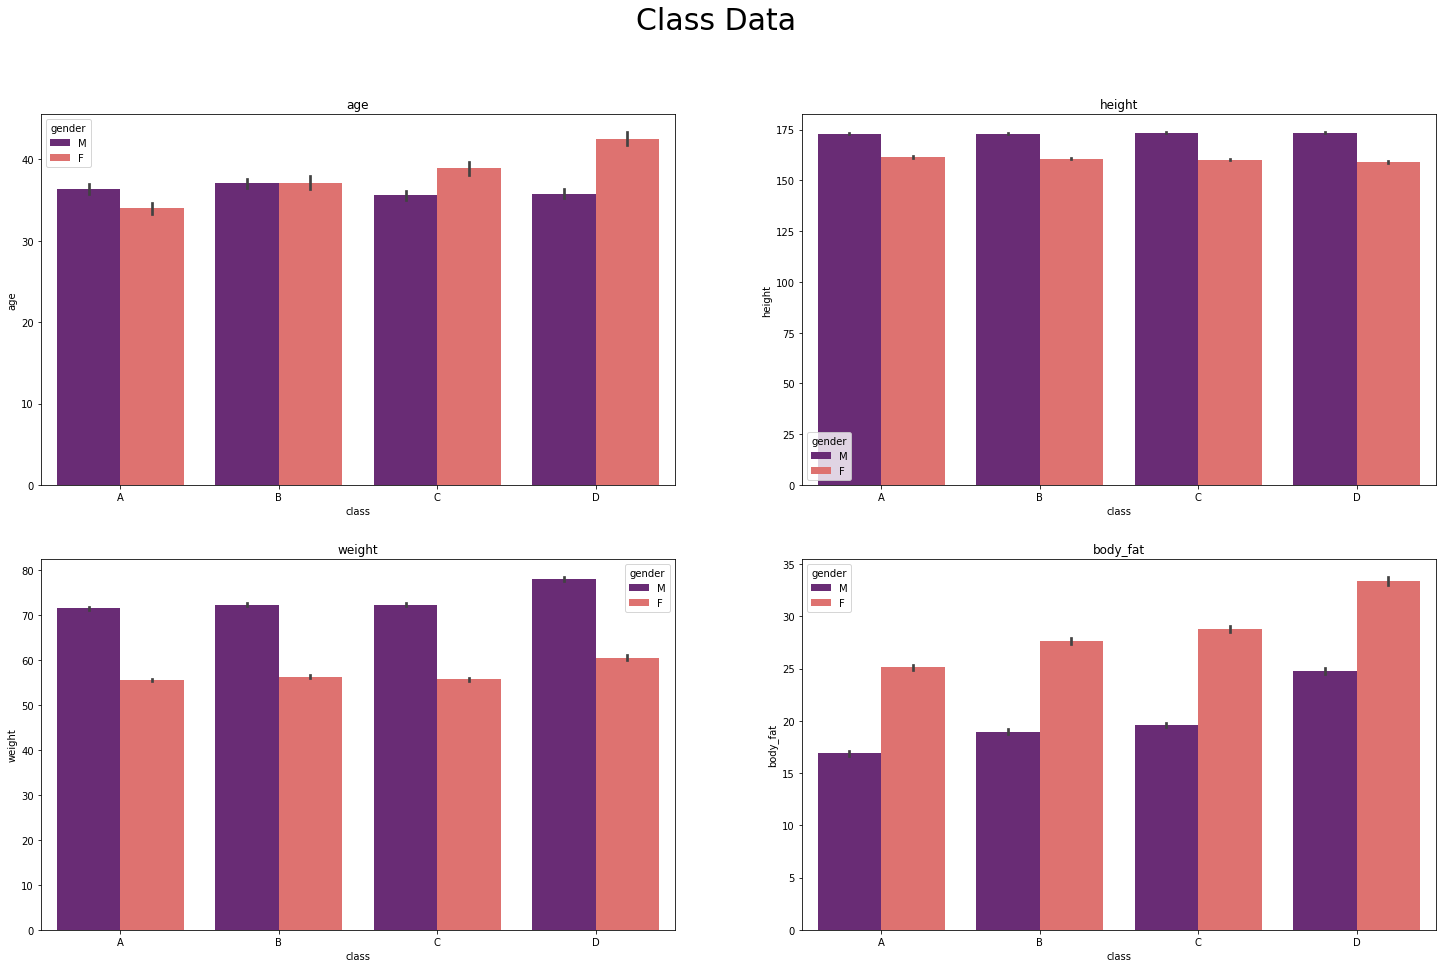

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('Class Data', fontsize=30)
sns.barplot(data=class_data, x=class_data['class'].sort_values() , y='age', ax=ax[0,0], hue=df['gender'],palette = 'magma').set_title('age')
sns.barplot(data=class_data, x=class_data['class'].sort_values() , y='height', ax=ax[0,1], hue=df['gender'], palette = 'magma').set_title('height')
sns.barplot(data=class_data, x=class_data['class'].sort_values() , y='weight', ax=ax[1,0],hue=df['gender'], palette = 'magma').set_title('weight')
sns.barplot(data=class_data, x=class_data['class'].sort_values() , y='body_fat', ax=ax[1,1],hue=df['gender'], palette = 'magma').set_title('body_fat')
plt.show()

- Pada grafik age, dapat dilihat untuk kelas A dan B proprosi antara male dan female hampir sama, namun pada kelas c dan d terlihat umur female lebih besar daripada male.
- Jika dilihat tinggi user ditiap-tiap kelas, maka male rata-rata lenih tinggi.
- jika dilihat dari barplot weight, laki-laki disetiap kelas body performance jauh lebih berat dibandingkan perempuan.
- Untuk persentasi body fat dapat dilihat bahwa setiap kelas, persentase body fat female lebih tinggi dibandingkan male.

### 6. Melihat distribusi dataset dan outliers dengan BOXPLOT

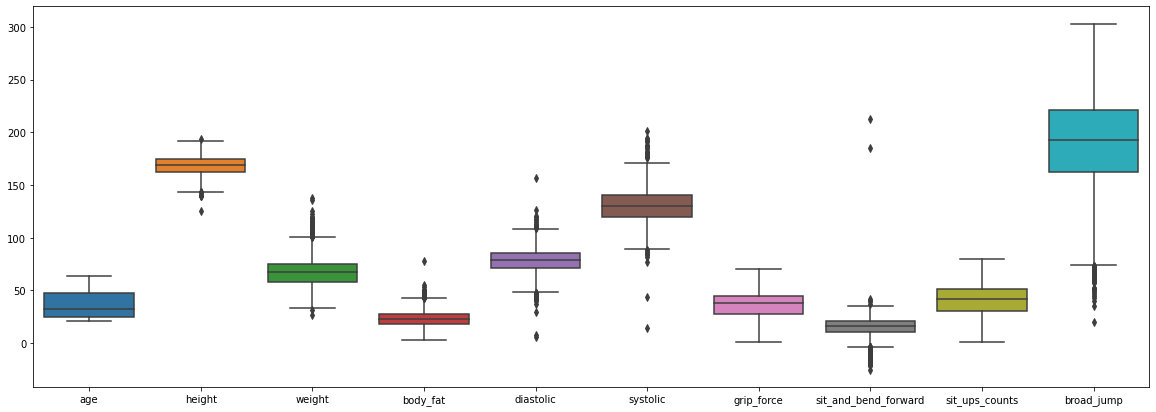

In [19]:
#Boxlot can plot outliers in data

plt.figure(figsize = (20, 7))
sns.boxplot(data = df)
plt.show()

Dari grafik boxplot diatas dapat dilihat bahwa ternyata jumlah outliers dari hasil pengukuran user cukup banyak.

### 7. melihat korelasi antar fitur numerical dataset

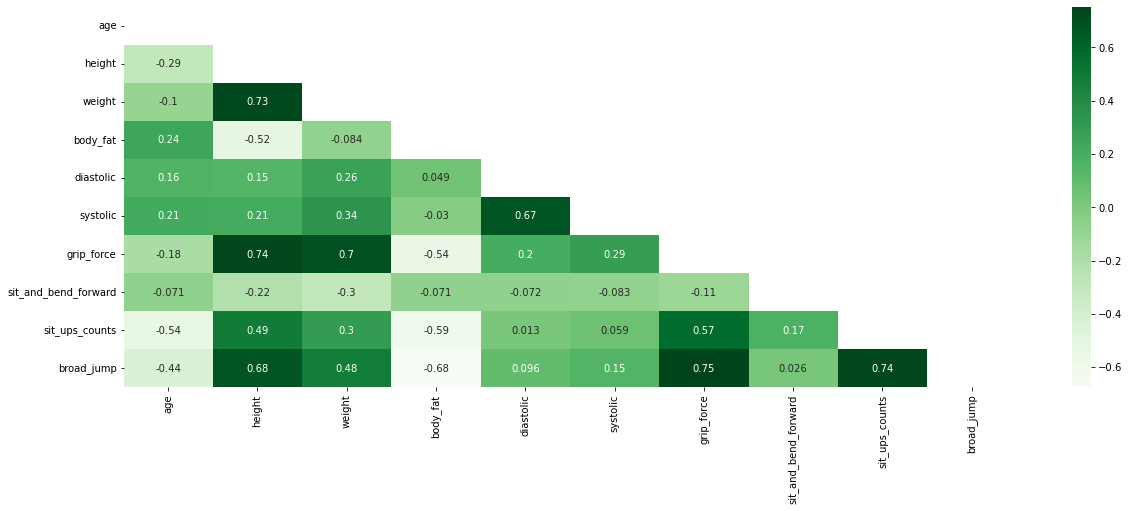

In [20]:
# plot the correlation heatmap

plt.figure(figsize=(20, 7))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask ,cmap='Greens')
plt.show()



`Terlihat beberapa kolom memiliki nilai korelasi yang cukup tinggi dengan kolom lainnya. Namun nilainya masih tidak diatas 90%.`

---
## 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Sebelum masuk kedalam data preprosessing, saya melakukan label encoding terlebih dahulu dengan menggunakan OrdinalEncoder, dimana A (BEST) memiliki value tertinggi dibandingkan dengan B (FIT), C (Normal), D (Not good). Dengan urutan sebagai berikut :

# A>B>C>D


In [21]:
# Mapping the value to our desired value

maplist = [{'col': 'class', 
            'mapping': {'D': 0, 
                        'C': 1,
                        'B': 2, 
                        'A': 3, 
                        }}]

In [22]:
# from category_encoders import OrdinalEncoder 

# define data
# define ordinal encoding
ordinal_encoder = OrdinalEncoder(mapping=maplist)
df[['class']] = ordinal_encoder.fit_transform(df[['class']])

### 1. Data Inference

In [23]:
# Get Data for Model Inference

data_inf = df.sample(43, random_state=17)
data_inf.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump,class
12618,29.0,M,186.8,83.8,14.0,83.0,147.0,41.9,15.5,62.0,227.0,3
2732,35.0,M,166.7,67.1,20.4,86.0,150.0,44.2,16.7,61.0,222.0,3
8303,21.0,F,155.2,43.1,17.8,92.0,133.0,25.2,24.4,33.0,163.0,2
5822,47.0,F,157.7,59.6,31.4,61.0,118.0,31.0,16.9,36.0,175.0,2
11485,38.0,M,180.1,71.1,18.5,85.0,114.0,49.9,5.0,43.0,207.0,1


In [24]:
# Remove Inference-Set from Dataset

data_train_test = df.drop(data_inf.index)
data_train_test.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [25]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump,class
0,29.0,M,186.8,83.8,14.0,83.0,147.0,41.9,15.5,62.0,227.0,3
1,35.0,M,166.7,67.1,20.4,86.0,150.0,44.2,16.7,61.0,222.0,3
2,21.0,F,155.2,43.1,17.8,92.0,133.0,25.2,24.4,33.0,163.0,2
3,47.0,F,157.7,59.6,31.4,61.0,118.0,31.0,16.9,36.0,175.0,2
4,38.0,M,180.1,71.1,18.5,85.0,114.0,49.9,5.0,43.0,207.0,1


### 2. Splitting Dataset

In [26]:
# Split between X (features) and y (target)

X = data_train_test.drop('class', axis=1)
y = data_train_test['class']
X

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...
13345,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13346,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13347,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13348,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,NaN,75.0


In [27]:
# Split between Train-Set and Test-Set

# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=17)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_train :' , y_train.shape)
print('y_test :', y_test.shape)

X_Train Size :  (10680, 11)
X_Test Size  :  (2670, 11)
y_train : (10680,)
y_test : (2670,)


### 3. Handling Outlier

In [28]:
# Function to create histogram and cecking outlier.

def cek_outlier(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='grey', edgecolor='black')
    plt.title(f'{variable} Histogram')

    cek_skew0 = df[variable].skew()
    print (f'{variable} Skewness :', cek_skew0)

    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])

    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])

    if cek_skew0 < 0.5 and cek_skew0 > -0.5:
        # Boxplot normal distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys')
        plt.title('Boxplot normal dist.')
        plt.show()
        
        print(f'normal distribution - Jumlah {variable} outlier : ', len(total_normal))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper)/len(df[variable]) * 100) + (len(outlier_lower)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')
    else :
        # Boxplot skewed distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys', showmeans=True)
        plt.title('Boxplot skewed dist.')
        plt.show()

        # Mean, median, modus
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]

        if  mean > median and median > mode :
            print (f'Right skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        elif mean < median and median < mode :
            print (f'Left skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        else:
            print(f'skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
            
        # print(f'Jumlah {variable} outlier : ', len(total_skew))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper_skew)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower_skew)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper_skew)/len(df[variable]) * 100) + (len(outlier_lower_skew)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')

# Function to see precentage of every outlier  
def rank_normal(df, variable):
    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])
    pctg = (len(total_normal)/len(df[variable])* 100)
    print(f'{variable} : {len(total_normal)}  ({round(pctg,2)})%')

def rank_skew(df, variable):
    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])
    pctg = (len(total_skew)/len(df[variable])* 100)
    print(f'{variable} : {len(total_skew)}  ({round(pctg,2)})%')

##### X_train :

In [29]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
print(num_col)

['age', 'height', 'weight', 'body_fat', 'diastolic', 'systolic', 'grip_force', 'sit_and_bend_forward', 'sit_ups_counts', 'broad_jump']


age Skewness : 0.5820884948783214


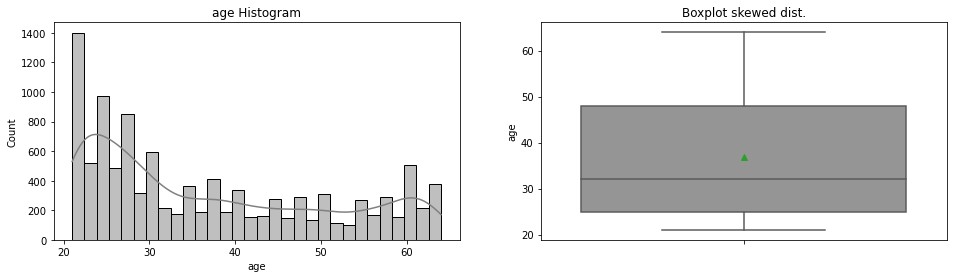

Right skewed distribution, Jumlah age outlier :  0
jumlah data :  10680
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------

height Skewness : -0.18239784261238107


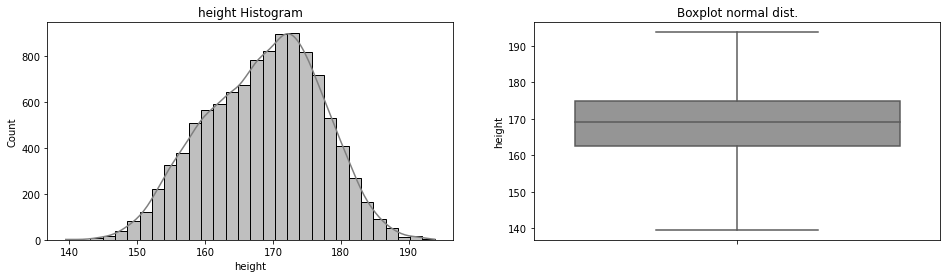

normal distribution - Jumlah height outlier :  3
jumlah data :  10680
% upper outliers :  0.0
% lower outliers :  0.028
% Total outliers :  0.028
--------------------------------------------------------------------------------------------------------

weight Skewness : 0.34702926786363425


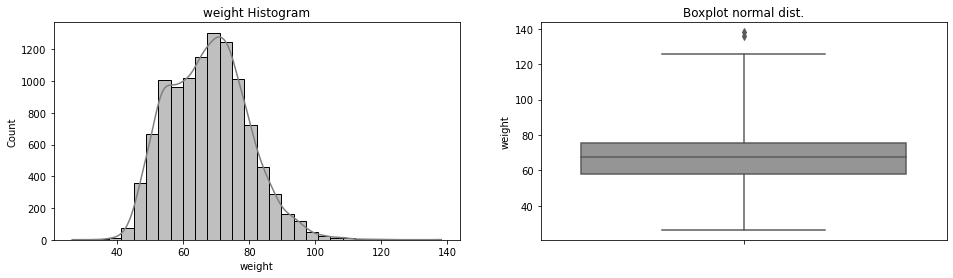

normal distribution - Jumlah weight outlier :  45
jumlah data :  10680
% upper outliers :  0.412
% lower outliers :  0.009
% Total outliers :  0.421
--------------------------------------------------------------------------------------------------------

body_fat Skewness : 0.37183723990068945


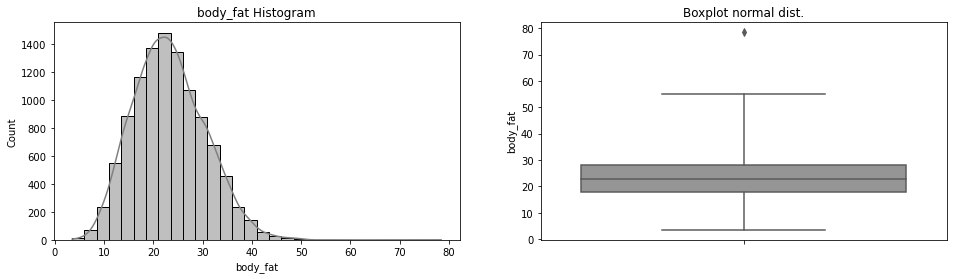

normal distribution - Jumlah body_fat outlier :  37
jumlah data :  10680
% upper outliers :  0.346
% lower outliers :  0.0
% Total outliers :  0.346
--------------------------------------------------------------------------------------------------------

diastolic Skewness : -0.14842224311631613


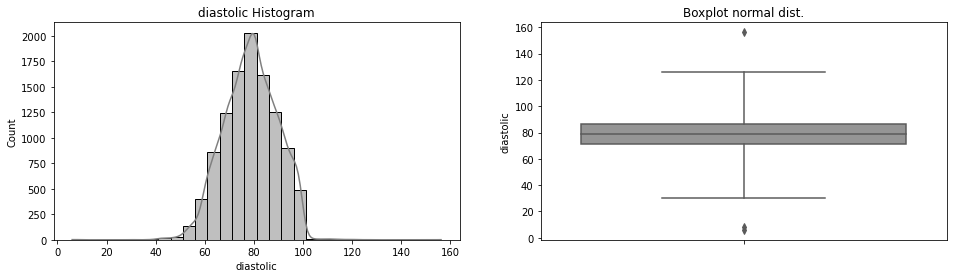

normal distribution - Jumlah diastolic outlier :  34
jumlah data :  10680
% upper outliers :  0.094
% lower outliers :  0.225
% Total outliers :  0.318
--------------------------------------------------------------------------------------------------------

systolic Skewness : -0.019759659095471175


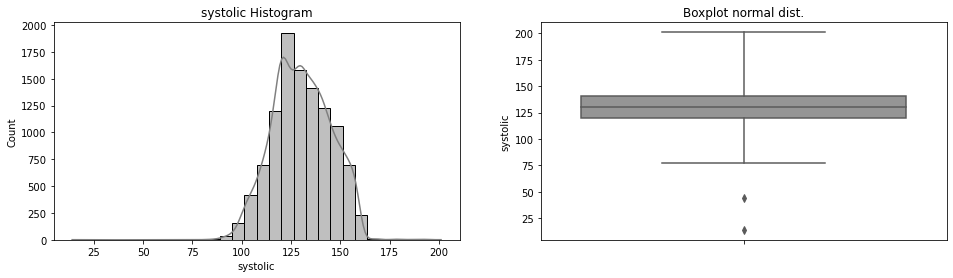

normal distribution - Jumlah systolic outlier :  21
jumlah data :  10680
% upper outliers :  0.131
% lower outliers :  0.066
% Total outliers :  0.197
--------------------------------------------------------------------------------------------------------

grip_force Skewness : 0.025911306861660037


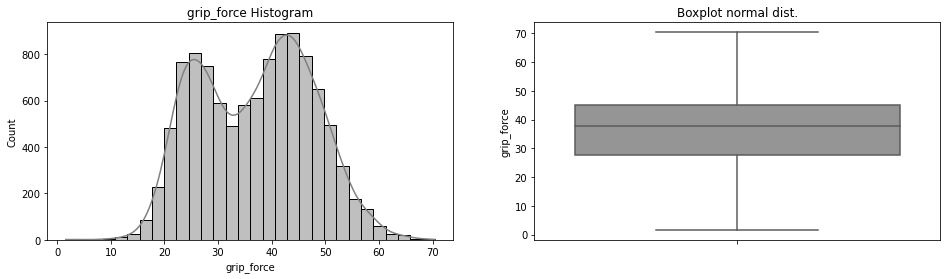

normal distribution - Jumlah grip_force outlier :  6
jumlah data :  10680
% upper outliers :  0.028
% lower outliers :  0.028
% Total outliers :  0.056
--------------------------------------------------------------------------------------------------------

sit_and_bend_forward Skewness : 1.1936673128312862


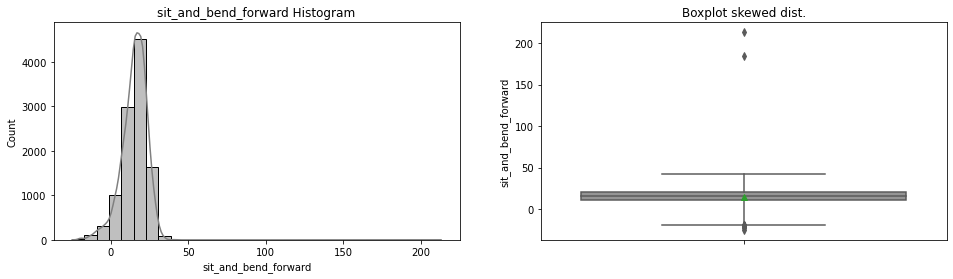

Left skewed distribution, Jumlah sit_and_bend_forward outlier :  17
jumlah data :  10680
% upper outliers :  0.019
% lower outliers :  0.14
% Total outliers :  0.159
--------------------------------------------------------------------------------------------------------

sit_ups_counts Skewness : -0.3772264117931873


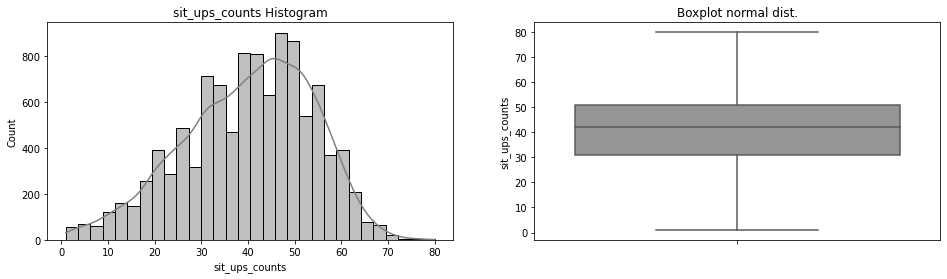

normal distribution - Jumlah sit_ups_counts outlier :  0
jumlah data :  10680
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------

broad_jump Skewness : -0.36848364409711337


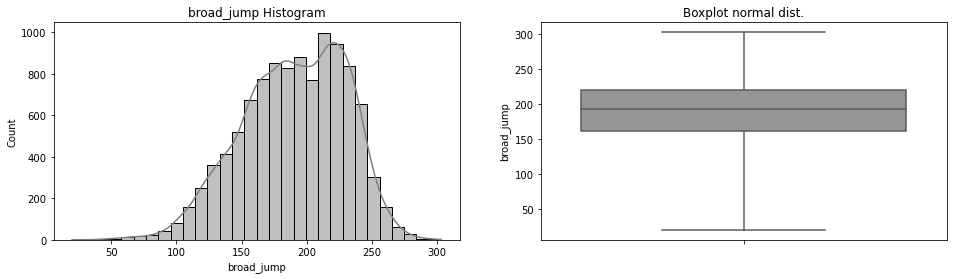

normal distribution - Jumlah broad_jump outlier :  34
jumlah data :  10680
% upper outliers :  0.0
% lower outliers :  0.318
% Total outliers :  0.318
--------------------------------------------------------------------------------------------------------



In [30]:
for i in num_col:
    cek_outlier(X_train, i)

In [31]:
# looping untuk membagi data normal distribution dan skewed distribution
normal = []
skew = []
for i in num_col:
    if X_train[i].skew() > - 0.5 and X_train[i].skew() < 0.5 :
        normal.append(i)
    else :
        skew.append(i)

print('Normal :\n----------------------')
for i in normal:
    rank_normal(X_train, i)
print('\nSkewed : \n--------------------------')
for i in skew:
    rank_skew(X_train, i)

Normal :
----------------------
height : 3  (0.03)%
weight : 45  (0.42)%
body_fat : 37  (0.35)%
diastolic : 34  (0.32)%
systolic : 21  (0.2)%
grip_force : 6  (0.06)%
sit_ups_counts : 0  (0.0)%
broad_jump : 34  (0.32)%

Skewed : 
--------------------------
age : 0  (0.0)%
sit_and_bend_forward : 17  (0.16)%


`Hasil pengecekan outlier pada kolom numerical didapatkan bahwa hampir semua outliers < 5%, sehingga semuanya dapat di-drop.`

### Pertama : Handling outlier pada normal distribution

In [32]:
X_train_ori = X_train.copy()

In [33]:
# Fucntion to detect outlier's index

def show_outliers(df, variable):
    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower]).index

    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew]).index

    if df[variable].skew() > - 0.5 and df[variable].skew() < 0.5 :
        print('Normal dist. :')
        return total_normal
    else :
        print('skewed dist. :')
        return total_skew


- Height

In [34]:
# Show outlier's index 

show_outliers(X_train, 'height')

Normal dist. :


Int64Index([11203, 6040, 6864], dtype='int64')

In [35]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'height'))
X_train.shape

Normal dist. :


(10677, 11)

- Weight

In [36]:
# Show outlier's index 

show_outliers(X_train, 'weight')

Normal dist. :


Int64Index([11004, 11105,  5526,  2554,  4898,  4907, 11537,  5239,   553,
              302,  8257, 11111, 11058,  1993,  9416,  6595, 11742,  1263,
             3633, 11951,   514,  9231,  3153,   231,  3412,   812,   358,
             4554,  4980,  8359,  6695,  4272,  3531, 12850,  1187,  8742,
             1708, 11651,  4059,  9151,   418,  6463,  9994, 11333,  4355],
           dtype='int64')

In [37]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'weight'))
X_train.shape

Normal dist. :


(10632, 11)

- body_fat

In [38]:
# Show outlier's index 

show_outliers(X_train, 'body_fat')

Normal dist. :


Int64Index([12889,  2177,  5887, 12078, 11452,  3779,  9296,  2784,  9971,
             6456,   581,  5407,  3476, 11494,  2202, 10174, 12844, 10618,
            10401,   734,  7331,  5517,  5375,  1586,  4823,  4068,  7520,
              717,  8575,  3630, 10577, 10410,  6146,  2996,  7360, 10270],
           dtype='int64')

In [39]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'body_fat'))
X_train.shape

Normal dist. :


(10596, 11)

- diastolic

In [40]:
# Show outlier's index 

show_outliers(X_train, 'diastolic')

Normal dist. :


Int64Index([12653,  7476,  8452,   684,  9347,   488,  8508, 12767, 10782,
             7378,  8536, 12658, 10972,  6332, 11439,  3752,  4359,  3512,
             6768,  9725, 11171,  8194,  6217, 10037,   343,  9487,  4365,
              809,  7322,  7056,   898,   335,  4410, 11088],
           dtype='int64')

In [41]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'diastolic'))
X_train.shape

Normal dist. :


(10562, 11)

- systolic

In [42]:
# Show outlier's index 

show_outliers(X_train, 'systolic')

Normal dist. :


Int64Index([  295,  3653,  6257,  6230, 13156,  2257, 13201,  8345,  4416,
             4104,  1215,  9412,  7578,  4397, 12434],
           dtype='int64')

In [43]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'systolic'))
X_train.shape

Normal dist. :


(10547, 11)

- grip_force

In [44]:
# Show outlier's index 

show_outliers(X_train, 'grip_force')

Normal dist. :


Int64Index([11493, 5098, 5942, 1844, 10916, 10266, 5789], dtype='int64')

In [45]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'grip_force'))
X_train.shape

Normal dist. :


(10540, 11)

- sit_ups_counts 

In [46]:
# Show outlier's index 

show_outliers(X_train, 'sit_ups_counts')

Normal dist. :


Int64Index([], dtype='int64')

In [47]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'sit_ups_counts'))
X_train.shape

Normal dist. :


(10540, 11)

- broad_jump 

In [48]:
# Show outlier's index 

show_outliers(X_train, 'broad_jump')

Normal dist. :


Int64Index([ 9014,  7983,   509, 10900,   136,  2243,  6976,  6269,  8266,
             7546, 12215,  9873,  2486, 12685,  2653, 11028,  1653,  2447,
             3148,  8205,  8724,  4655,   498,  5140, 10346,  2777, 12300,
             8398],
           dtype='int64')

In [49]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'broad_jump'))
X_train.shape

Normal dist. :


(10512, 11)

### Kedua : Handling outlier pada skewed distribution

- sit_and_bend_forward 

In [50]:
# Show outlier's index 

show_outliers(X_train, 'sit_and_bend_forward')

skewed dist. :


Int64Index([  736,  2647,  3343,  3366,  6424,  8082,  9029,  9372,  9628,
             9807, 10975, 11426, 11585, 11922, 12534, 13337],
           dtype='int64')

In [51]:
# Handling outliers

X_train = X_train.drop(show_outliers(X_train, 'sit_and_bend_forward'))
X_train.shape

skewed dist. :


(10496, 11)

##### y_train :
>y_train tidak memiliki outlier karena merupakan categorical data. Akan tetapi, ukuran y_train harus disesuaikan dengan ukuran X_train.

In [52]:
# ukuran awal y_train

y_train.shape

(10680,)

In [53]:
# Menyamakan ukuran y_train dengan ukuran X_train

y_train = y_train.loc[X_train.index]

In [54]:
# Ukuran akhir

y_train.shape

(10496,)

Mengecek berapa persen data yang di-drop dalam proses handling outliers :

In [55]:
print ('ukuran data setelah handling outliers :' , X_train.shape)
print ('data yang di-drop % :', np.round(((X_train_ori.shape[0] - X_train.shape[0])/X_train_ori.shape[0]) * 100, decimals=2))

ukuran data setelah handling outliers : (10496, 11)
data yang di-drop % : 1.72


**`DATASET sudah bersih dari Outliers`**


###  4. Handling Missing Values

#### TRAIN SET

In [56]:
# Checking missing values

missing = pd.DataFrame(X_train.isnull().sum(), columns = ['missing value'])
missing['%pctg'] = (missing/len(X_train)).round(3) * 100
missing[missing['missing value'] > 0].sort_values(by='%pctg')

,missing value,%pctg
diastolic,1,0.0
systolic,1,0.0
grip_force,2,0.0
sit_and_bend_forward,9,0.1
broad_jump,6,0.1
sit_ups_counts,75,0.7


`Missing value pada dataset berjumlah < 5% ditiap-tiap kolomnya, sehingga dapat dihandling dengan metode CCA/dropping.`

- ##### X_train :

In [57]:
# Drop missing values

X_train.dropna(axis=0, subset=['diastolic','systolic','grip_force','sit_and_bend_forward','broad_jump','sit_ups_counts'], inplace=True)

- ##### y_train :

In [58]:
X_train.shape

(10405, 11)

In [59]:
y_train.shape

(10496,)

In [60]:
# Menyamakan ukuran antara y_train dengan X_train

y_train = y_train.loc[X_train.index]

In [61]:
y_train.index

Int64Index([ 8097,  4551,  5200,  3756,  1193,  6598,  1809,  6265,  9410,
             2012,
            ...
             6231,  3868,  6150,  4231,  3529, 12231, 10316,  4845, 10453,
            10988],
           dtype='int64', length=10405)

#### TEST SET

In [62]:
X_test.isnull().sum()

age                      0
gender                   0
height                   0
weight                   0
body_fat                 0
diastolic                0
systolic                 0
grip_force               1
sit_and_bend_forward     2
sit_ups_counts          22
broad_jump               3
dtype: int64

In [63]:
# Check missing values on X_test
missing_test = pd.DataFrame(X_test.isnull().sum(), columns = ['missing value'])
missing_test['%pctg'] = (missing_test/len(X_test)).round(2) * 100
missing_test[missing_test['missing value'] > 0].sort_values(by='%pctg')

,missing value,%pctg
grip_force,1,0.0
sit_and_bend_forward,2,0.0
broad_jump,3,0.0
sit_ups_counts,22,1.0


- ##### X_test :

In [64]:
# Drop missing values

X_test.dropna(axis=0, subset=['sit_and_bend_forward','grip_force','broad_jump','sit_ups_counts'], inplace=True)

- ##### y_test :

In [65]:
X_test.shape

(2644, 11)

In [66]:
y_test.shape

(2670,)

In [67]:
# Menyamakan ukuran antara y_train dengan X_train

y_test = y_test.loc[X_test.index]

In [68]:
X_test.shape

(2644, 11)

Mengecek berapa persen data yang di-drop dalam proses handling Missing Values :

In [69]:
print ('ukuran data setelah handling missing values :' , X_train.shape)
print ('data yang di-drop % :', np.round(((10502 - X_train.shape[0])/10502) * 100, decimals=2))

ukuran data setelah handling missing values : (10405, 11)
data yang di-drop % : 0.92


In [70]:
X_train

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump
8097,26.0,F,159.6,47.2,22.5,71.0,108.0,24.0,-6.0,8.0,142.0
4551,30.0,M,176.4,71.6,17.2,83.0,117.0,48.7,16.0,53.0,225.0
5200,64.0,F,160.3,56.8,35.9,57.0,118.0,18.7,19.1,29.0,90.0
3756,35.0,M,181.0,78.5,15.4,87.0,146.0,45.5,-1.5,62.0,267.0
1193,64.0,M,157.5,61.4,35.2,92.0,148.0,34.8,-3.4,10.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...
12231,42.0,M,175.0,80.4,27.1,93.0,149.0,40.6,16.0,22.0,210.0
10316,61.0,M,160.7,74.3,32.1,97.0,153.0,35.2,5.0,21.0,132.0
4845,23.0,M,179.1,81.6,22.9,70.0,137.0,47.8,12.2,58.0,232.0
10453,31.0,M,181.6,87.5,16.2,87.0,111.0,56.6,22.1,56.0,215.0


**`DATASET sudah bersih dari Missing values`**

### 5. Feature Selection

##### 1. Melihat Data Train setelah handling outliers dan missing values

In [71]:
X_train.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump
8097,26.0,F,159.6,47.2,22.5,71.0,108.0,24.0,-6.0,8.0,142.0
4551,30.0,M,176.4,71.6,17.2,83.0,117.0,48.7,16.0,53.0,225.0
5200,64.0,F,160.3,56.8,35.9,57.0,118.0,18.7,19.1,29.0,90.0
3756,35.0,M,181.0,78.5,15.4,87.0,146.0,45.5,-1.5,62.0,267.0
1193,64.0,M,157.5,61.4,35.2,92.0,148.0,34.8,-3.4,10.0,160.0


In [72]:
y_train.head()

8097    0
4551    2
5200    1
3756    0
1193    0
Name: class, dtype: int32

##### 2. Split between numerical and categorical columns


In [73]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('\n------------------------------------------------------------------------------------------\n')
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'height', 'weight', 'body_fat', 'diastolic', 'systolic', 'grip_force', 'sit_and_bend_forward', 'sit_ups_counts', 'broad_jump']

------------------------------------------------------------------------------------------

Categorical Columns :  ['gender']


In [74]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

##### 3. Feature Scaling

In [75]:
# Display X_train_num

X_train_num.head()

,age,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump
8097,26.0,159.6,47.2,22.5,71.0,108.0,24.0,-6.0,8.0,142.0
4551,30.0,176.4,71.6,17.2,83.0,117.0,48.7,16.0,53.0,225.0
5200,64.0,160.3,56.8,35.9,57.0,118.0,18.7,19.1,29.0,90.0
3756,35.0,181.0,78.5,15.4,87.0,146.0,45.5,-1.5,62.0,267.0
1193,64.0,157.5,61.4,35.2,92.0,148.0,34.8,-3.4,10.0,160.0


In [76]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-0.79140264, -1.10094463, -1.74366052, ..., -2.67684707,
        -2.35286876, -1.29234143],
       [-0.4968726 ,  0.92839653,  0.36839647, ...,  0.08869088,
         0.93152772,  0.87872269],
       [ 2.00663274, -1.01638875, -0.91268728, ...,  0.47838032,
        -0.8201504 , -2.65252618],
       ...,
       [-1.01230018,  1.25454065,  1.2339936 , ..., -0.38899295,
         1.29646067,  1.06182448],
       [-0.42324009,  1.55652594,  1.74469591, ...,  0.85549913,
         1.15048749,  0.6171487 ],
       [-1.1595652 ,  0.28818771, -0.15961777, ...,  0.13897339,
         0.12867525,  0.30325991]])

##### 4. Feature Encoding

In [77]:
# Display X_train_cat

X_train_cat.head()

,gender
8097,F
4551,M
5200,F
3756,M
1193,M


In [78]:
# Feature Encoding using One Hot Encoding

encoder =  OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

##### 5. Concat between Numerical Columns and Categorical Columns

In [79]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_train_final

array([[-0.79140264, -1.10094463, -1.74366052, ..., -1.29234143,
         1.        ,  0.        ],
       [-0.4968726 ,  0.92839653,  0.36839647, ...,  0.87872269,
         0.        ,  1.        ],
       [ 2.00663274, -1.01638875, -0.91268728, ..., -2.65252618,
         1.        ,  0.        ],
       ...,
       [-1.01230018,  1.25454065,  1.2339936 , ...,  1.06182448,
         0.        ,  1.        ],
       [-0.42324009,  1.55652594,  1.74469591, ...,  0.6171487 ,
         0.        ,  1.        ],
       [-1.1595652 ,  0.28818771, -0.15961777, ...,  0.30325991,
         0.        ,  1.        ]])

In [80]:
X_train_final.shape

(10405, 12)

In [81]:
X_test_final.shape

(2644, 12)

In [82]:
# make columns name
test = encoder.get_feature_names(X_train_cat.columns.tolist())
column_cat = test.tolist()
column_cat

['gender_F', 'gender_M']

In [83]:
# Display Concate's Result as a DataFrame

X_train_final_keep= pd.DataFrame(X_train_final, columns=[num_columns + column_cat])
X_test_final_keep = pd.DataFrame(X_test_final, columns=[num_columns + column_cat])
X_train_final_keep

,age,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump,gender_F,gender_M
0,-0.791403,-1.100945,-1.743661,-0.068022,-0.743845,-1.548354,-1.256712,-2.676847,-2.352869,-1.292341,1.0,0.0
1,-0.496873,0.928397,0.368396,-0.826808,0.398509,-0.922861,1.103312,0.088691,0.931528,0.878723,0.0,1.0
2,2.006633,-1.016389,-0.912687,1.850419,-2.076591,-0.853362,-1.763114,0.478380,-0.820150,-2.652526,1.0,0.0
3,-0.128710,1.484049,0.965658,-1.084509,0.779294,1.092618,0.797560,-2.111169,1.588407,1.977333,0.0,1.0
4,2.006633,-1.354612,-0.514513,1.750202,1.255274,1.231617,-0.224798,-2.350011,-2.206896,-0.821508,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10400,0.386718,0.759285,1.130122,0.590548,1.350471,1.301116,0.329377,0.088691,-1.331057,0.486362,0.0,1.0
10401,1.785735,-0.968071,0.602108,1.306384,1.731255,1.579113,-0.186579,-1.294078,-1.404043,-1.553915,0.0,1.0
10402,-1.012300,1.254541,1.233994,-0.010755,-0.839041,0.467125,1.017320,-0.388993,1.296461,1.061824,0.0,1.0
10403,-0.423240,1.556526,1.744696,-0.969975,0.779294,-1.339857,1.858138,0.855499,1.150487,0.617149,0.0,1.0


##### Jadi setelah mencoba menjalankan model sebelumnya, saya merasa bahwa dengan meng-keep fiture pada dataset ini dapa menghasilkan model dengan accuracy yang lebih baik, oleh karena itu saya akan membandingkan, hasil test accuracy model dengan feature selection dengan model hasil PCA.

##### 6. PCA

In [84]:
X_train_pca = X_train_final.copy()
X_test_pca = X_test_final.copy()

In [85]:
# Using PCA

pca = PCA()
pca.fit(X_train_pca)

PCA()

In [86]:
# Melihat berapa variance yang dijelaskan oleh masing-masing variabel.

pca.explained_variance_ratio_

array([4.33553868e-01, 1.97194686e-01, 1.14541684e-01, 7.80944149e-02,
       6.18731496e-02, 3.10895344e-02, 2.94367649e-02, 2.11590111e-02,
       1.66499733e-02, 9.57336711e-03, 6.83354655e-03, 4.96825190e-34])

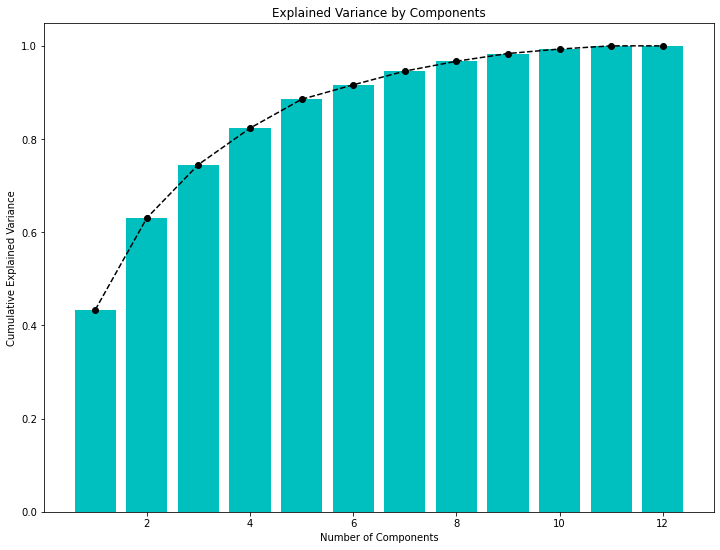

In [87]:
# Plotting the explained_variance_ratio dari masing-masing variabel

plt.figure(figsize=(12,9))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle= '--', color='black')
plt.bar(range(1,13), pca.explained_variance_ratio_.cumsum(), color = 'c')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [88]:
# check how much variance can be preserved

preserved_df= np.cumsum(pca.explained_variance_ratio_)[8]

print('Dengan mereduksi dimensionality menjadi 7 kolom, maka informasi yang akan digunakan dalam pembuatan model adalah sekitar :', np.round(preserved_df*100, 2),'%')

Dengan mereduksi dimensionality menjadi 7 kolom, maka informasi yang akan digunakan dalam pembuatan model adalah sekitar : 98.36 %


##### 3. PCA with choosen n_components

In [89]:
# Mengunakan n_component=7, maka :

pca = PCA(n_components=7)

In [90]:
# Fit out data to PCA with choosen N_component

pca_X_train = pca.fit_transform(X_train_pca)
pca_X_train

array([[ 3.14446257, -0.48637446,  2.54307613, ...,  2.45100596,
         0.83422448,  0.09874207],
       [-2.02983182, -0.86555232,  0.11043277, ..., -0.08442001,
         0.40103574,  0.9506975 ],
       [ 4.44005692, -0.09973158,  0.97589476, ..., -1.37414185,
        -0.69622074, -0.68893046],
       ...,
       [-2.57689874, -0.56131999,  0.69920323, ..., -0.50492096,
        -0.62363268, -0.70705456],
       [-2.99486311, -0.70229663,  0.07188953, ..., -1.40977813,
         0.92972311,  1.36858254],
       [-0.97801812, -0.71284372, -0.33282733, ...,  0.69417259,
        -0.01324721, -1.71513699]])

In [91]:
pca_X_test = pca.transform(X_test_pca)

In [92]:
pca_X_test

array([[-0.51176038,  0.95909229, -0.7764403 , ...,  1.19039751,
        -0.0347802 ,  0.23329007],
       [ 2.67250949, -2.42733113,  0.68675552, ..., -0.04765337,
         0.03997237,  0.03062922],
       [-1.07153512,  2.2443135 ,  2.53873693, ...,  0.03049255,
         0.49416552, -0.65265072],
       ...,
       [-2.40342144,  0.22369831,  2.7210445 , ...,  0.27131038,
         0.46111716,  0.30821537],
       [-1.9949107 ,  2.26507768,  0.95813897, ..., -0.01325896,
         0.19564445, -0.48534933],
       [-1.90728134, -1.87759339,  0.57023747, ..., -0.08676402,
        -0.48814071, -0.15093738]])

In [93]:
# Putting components in a dataframe for later

PCA_components = pd.DataFrame(pca_X_train)
PCA_components

,0,1,2,3,4,5,6
0,3.144463,-0.486374,2.543076,0.186023,2.451006,0.834224,0.098742
1,-2.029832,-0.865552,0.110433,-0.131376,-0.084420,0.401036,0.950697
2,4.440057,-0.099732,0.975895,-0.831701,-1.374142,-0.696221,-0.688930
3,-3.575996,0.819872,0.606336,0.092689,1.478136,-0.542438,0.016034
4,2.152835,3.798990,1.067639,-0.396177,1.063679,-0.806547,0.461439
...,...,...,...,...,...,...,...
10400,-0.825909,2.310218,-0.258249,0.344439,-0.648030,0.834493,-0.223165
10401,1.417152,3.889767,0.198116,-0.059240,0.248566,-0.480172,0.258918
10402,-2.576899,-0.561320,0.699203,0.774729,-0.504921,-0.623633,-0.707055
10403,-2.994863,-0.702297,0.071890,-0.040352,-1.409778,0.929723,1.368583


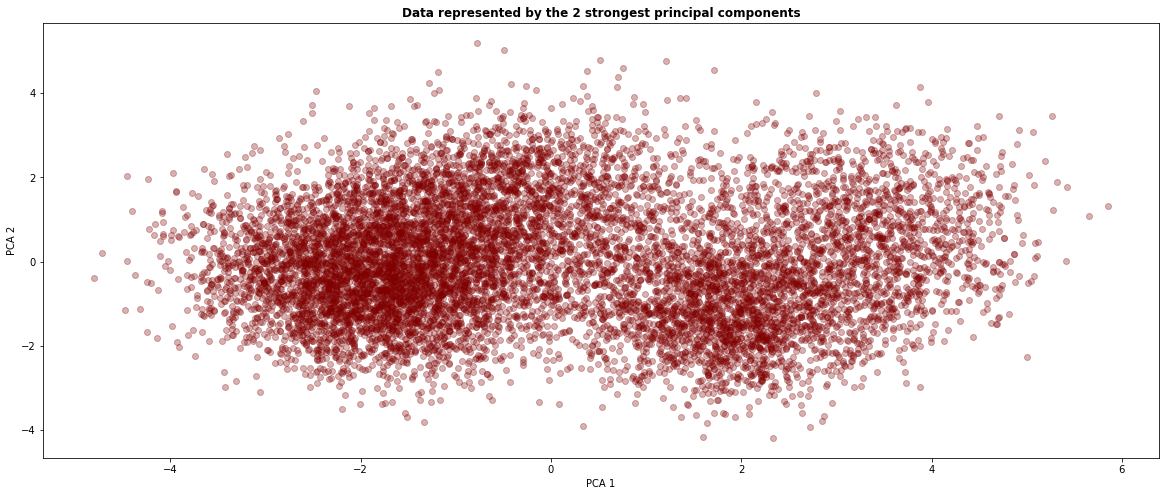

In [94]:
# plotting 2 component with high percentage of data preserved

plt.figure(figsize=(20,8))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='maroon')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

---

##### 7. Predict accuracy with different algorithms (No feature selection VS PCA)

In [95]:
names = ["Naive Bayes", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting" ]    

In [96]:
classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
   ]

1. Without feature selection

In [97]:
# accuracy_scores = []

# iterate over classifiers and predict accuracy

for name, clf in zip(names, classifiers):
    clf.fit(X_train_final, y_train)
    score = clf.score(X_test_final, y_test)
    score = round(score, 4)
    # accuracy_scores.append(score)
    print(name ,' : ' , score)

Naive Bayes  :  0.5522
Decision Tree  :  0.6426
Random Forest  :  0.7451
AdaBoost  :  0.5957
Gradient Boosting  :  0.711


2. With PCA

In [98]:
# iterate over classifiers and predict accuracy

for name, clf in zip(names, classifiers):
    clf.fit(pca_X_train, y_train)
    score = clf.score(pca_X_test, y_test)
    score = round(score, 4)
    print(name ,' : ' , score)

Naive Bayes  :  0.5741
Decision Tree  :  0.5246
Random Forest  :  0.6207
AdaBoost  :  0.5658
Gradient Boosting  :  0.6101


`Didapat bahwa dengan tanpa melakukan feature selection dapat menghasilkan model dengan accuracy yang lebih baik, oleh karena itu pada tahap selanjutnya saya akan menggunakan hasil scaling X_train dan y_train yang fitur-fiturnya masih tetap.`

### Data for training

In [99]:
X_train_final = X_train_final.copy()
X_test_final = X_test_final.copy()

In [100]:
X_train_final

array([[-0.79140264, -1.10094463, -1.74366052, ..., -1.29234143,
         1.        ,  0.        ],
       [-0.4968726 ,  0.92839653,  0.36839647, ...,  0.87872269,
         0.        ,  1.        ],
       [ 2.00663274, -1.01638875, -0.91268728, ..., -2.65252618,
         1.        ,  0.        ],
       ...,
       [-1.01230018,  1.25454065,  1.2339936 , ...,  1.06182448,
         0.        ,  1.        ],
       [-0.42324009,  1.55652594,  1.74469591, ...,  0.6171487 ,
         0.        ,  1.        ],
       [-1.1595652 ,  0.28818771, -0.15961777, ...,  0.30325991,
         0.        ,  1.        ]])

---
## 6.1 - Model Definition : Naive Bayes

In [101]:
# Model definition

model_nb = GaussianNB()

## 7.1 - Model Training : Naive Bayes

In [102]:
# Fit and train the model

model_nb.fit(X_train_final, y_train)

GaussianNB()

## 8.1 - Model Evaluation : Naive Bayes

In [103]:
# Get Prediction of Train-Set and Test-Set

y_pred_train_nb = model_nb.predict(X_train_final)
y_pred_test_nb = model_nb.predict(X_test_final)

In [104]:
# from sklearn.metrics import classification_report, accuracy_score

def accu_class(y_train, y_pred_train, y_test, y_pred_test):
    print('accuracy score - Train : ', accuracy_score(y_train, y_pred_train))
    print('accuracy score - Test  : ', accuracy_score(y_test, y_pred_test))
    print('----------------------------------------------------------------------------')
    print('Classification Report - Train : \n', classification_report(y_train, y_pred_train), '\n')
    print('----------------------------------------------------------------------------')
    print('Classification Report - Test: \n', classification_report(y_test, y_pred_test), '\n')

In [105]:
# Check Performance Model against Train-Set

accu_class(y_train, y_pred_train_nb, y_test, y_pred_test_nb)

accuracy score - Train :  0.5520422873618452
accuracy score - Test  :  0.5521936459909228
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69      2454
           1       0.52      0.44      0.48      2654
           2       0.41      0.36      0.39      2651
           3       0.58      0.71      0.64      2646

    accuracy                           0.55     10405
   macro avg       0.55      0.56      0.55     10405
weighted avg       0.54      0.55      0.54     10405
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       642
           1       0.53      0.40      0.46       667
           2       0.41      0.37      0.39       668
           3       0.57      0.74   

Hasil accuracy score : Menunjukkan good fit, walaupun persentasi akurasinya hanya 55%

In [106]:
# Cross Validation using `cross_val_score` for Naive bayes

acc_train_cross_val_nb = cross_val_score(model_nb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=7, scoring="accuracy", n_jobs=-1)

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_nb)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_nb.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_nb.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val_nb.mean()-acc_train_cross_val_nb.std()) , '-', (acc_train_cross_val_nb.mean()+acc_train_cross_val_nb.std()))

Accuracy - All - Cross Validation  :  [0.54001345 0.53127102 0.55077337 0.56191117 0.54037685 0.5666218
 0.55921938]
Accuracy - Mean - Cross Validation :  0.5500267200697398
Accuracy - Std - Cross Validation  :  0.012229130791538737
Accuracy - Range of Test-Set       :  0.5377975892782011 - 0.5622558508612786


---
## 6.2 - Model Definition : Decision Tree

In [107]:
# initiate the Decision Tree algorithm

model_dtree = DecisionTreeClassifier()

## 7.2 - Model Training : Decision Tree

In [108]:
# Training the model

model_dtree.fit(X_train_final, y_train)

DecisionTreeClassifier()

## 8.3 - Model Evaluation : Decision Tree

In [109]:
# Get Prediction of Train-Set and Test-Set

y_pred_train_dt = model_dtree.predict(X_train_final)
y_pred_test_dt = model_dtree.predict(X_test_final)

In [110]:
# Evaluate Model using accuracy_score

accu_class(y_train, y_pred_train_dt, y_test, y_pred_test_dt)

accuracy score - Train :  1.0
accuracy score - Test  :  0.649016641452345
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2454
           1       1.00      1.00      1.00      2654
           2       1.00      1.00      1.00      2651
           3       1.00      1.00      1.00      2646

    accuracy                           1.00     10405
   macro avg       1.00      1.00      1.00     10405
weighted avg       1.00      1.00      1.00     10405
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       642
           1       0.59      0.58      0.58       667
           2       0.55      0.56      0.55       668
           3       0.68      0.71      0.70       66

Hasil accuracy score : overfitting


In [111]:
# Cross Validation using `cross_val_score` for Decission Tree


acc_train_cross_val_dtree = cross_val_score(model_dtree, 
                                      X_train_final, 
                                      y_train, 
                                      cv=7, scoring="accuracy", n_jobs=-1)

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_dtree)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_dtree.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_dtree.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val_dtree.mean()-acc_train_cross_val_dtree.std()) , '-', (acc_train_cross_val_dtree.mean()+acc_train_cross_val_dtree.std()))

Accuracy - All - Cross Validation  :  [0.63416274 0.65770007 0.65904506 0.64064603 0.63526245 0.63257066
 0.62718708]
Accuracy - Mean - Cross Validation :  0.6409391551751401
Accuracy - Std - Cross Validation  :  0.011625918269638632
Accuracy - Range of Test-Set       :  0.6293132369055014 - 0.6525650734447788


`Setelah dilakukan cross validation, hasil accuracy rata-rata train adalah 64.1 dan test 64.5. hasil dari model menjadi good fit` 

---
## 6.3 - Model Definition : Random Forest

In [112]:
# Model definition

model_rf = RandomForestClassifier()

## 7.3 - Model Training : Random Forest

In [113]:
# trainin the model using random forest

model_rf.fit(X_train_final, y_train)

RandomForestClassifier()

## 8.3 - Model Evaluation : Random Forest

In [114]:
# Get Prediction of Train-Set and Test-Set
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_test_rf = model_rf.predict(X_test_final)

In [115]:
# Check Performance Model against Train-Set
accu_class(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

accuracy score - Train :  1.0
accuracy score - Test  :  0.7341149773071104
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2454
           1       1.00      1.00      1.00      2654
           2       1.00      1.00      1.00      2651
           3       1.00      1.00      1.00      2646

    accuracy                           1.00     10405
   macro avg       1.00      1.00      1.00     10405
weighted avg       1.00      1.00      1.00     10405
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       642
           1       0.72      0.67      0.69       667
           2       0.62      0.60      0.61       668
           3       0.73      0.87      0.79       6

`Hasil akurasi score memperlihatkan bahwa model yang dihasilkan mengalami overfitting. Namun hal ini dapa dihandle dengan melakukan cross validation.`

In [116]:
# Cross Validation using `cross_val_score` for Random Forest


acc_train_cross_val_rf = cross_val_score(model_rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=7, scoring="accuracy", n_jobs=-1)

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_rf)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_rf.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_rf.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val_rf.mean()-acc_train_cross_val_rf.std()) , '-', (acc_train_cross_val_rf.mean()+acc_train_cross_val_rf.std()))

Accuracy - All - Cross Validation  :  [0.71015467 0.73234701 0.73772697 0.73216689 0.73014805 0.72543742
 0.69717362]
Accuracy - Mean - Cross Validation :  0.7235935177227183
Accuracy - Std - Cross Validation  :  0.013495269172508269
Accuracy - Range of Test-Set       :  0.71009824855021 - 0.7370887868952266


`Setelah dilakukan cross validation, hasil accuracy rata-rata train adalah 72 dan test 73. hasil dari model menjadi good fit` 

---
## 6.4 - Model Definition : Gradient Boosting

In [117]:
# Initiate Gradient boosting classifier

model_gradboost = GradientBoostingClassifier()

## 7.4 - Model Training : Gradient Boosting

In [118]:
# Fit and train the model

model_gradboost.fit(X_train_final, y_train)

GradientBoostingClassifier()

## 8.4 - Model Evaluation : Gradient Boosting

In [119]:
# Get Prediction of Train-Set and Test-Set

y_pred_train_gradboost = model_gradboost.predict(X_train_final)
y_pred_test_gradboost = model_gradboost.predict(X_test_final)

In [120]:
# Check Performance Model against Train-Set

accu_class(y_train, y_pred_train_gradboost, y_test, y_pred_test_gradboost)

accuracy score - Train :  0.7654012493993273
accuracy score - Test  :  0.7114220877458396
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      2454
           1       0.78      0.68      0.73      2654
           2       0.66      0.66      0.66      2651
           3       0.73      0.91      0.81      2646

    accuracy                           0.77     10405
   macro avg       0.78      0.77      0.77     10405
weighted avg       0.77      0.77      0.76     10405
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       642
           1       0.72      0.59      0.65       667
           2       0.56      0.60      0.58       668
           3       0.70      0.89   

`Model yang dihasilkan cukup good fit.`

In [121]:
# Cross Validation using `cross_val_score` for GradientBoosting

acc_train_cross_val_gradboost = cross_val_score(model_gradboost, 
                                      X_train_final, 
                                      y_train, 
                                      cv=7, scoring="accuracy", n_jobs=-1)

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_gradboost)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_gradboost.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_gradboost.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val_gradboost.mean()-acc_train_cross_val_gradboost.std()) , '-', (acc_train_cross_val_gradboost.mean()+acc_train_cross_val_gradboost.std()))

Accuracy - All - Cross Validation  :  [0.70006725 0.72898453 0.72965703 0.72341857 0.70995962 0.70659489
 0.69380888]
Accuracy - Mean - Cross Validation :  0.713212967812951
Accuracy - Std - Cross Validation  :  0.013239634365429274
Accuracy - Range of Test-Set       :  0.6999733334475217 - 0.7264526021783803


---

#### Memilih model terbaik berdasarkan hasil cross validation evaluation :

Dari hasil cross validation diperoleh 2 terbaik sebagai berikut : 

                1. Random Forest  : ----------TERBAIK---------------
                        - Accuracy - Mean - Cross Validation :  0.725
                        - Accuracy - Range of Test-Set       :  0.715 - 0.735
                        - accuracy score - Test  :  0.735

                2. Gradient Boosting :
                        - Accuracy - Mean - Cross Validation :  0.713
                        - Accuracy - Range of Test-Set       :  0.699 - 0.726
                        - accuracy score - Test  :  0.711

Maka akan dipilih hasil dari Random Forest sebagai algorithma/model terbaik pada kasus ini.

---

### Hyperparameter Tuning

In [122]:
# Hyperparameter Tuning : Grid Search
# from sklearn.model_selection import GridSearchCV

# Reuse best hyperparameters from Random Search for efficiency
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [450, 500],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [3, 5],
    'n_estimators': [200, 500, 600]
}

param_grid

{'criterion': ['entropy'],
 'max_depth': [450, 500],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [3, 5],
 'n_estimators': [200, 500, 600]}

In [123]:
# Train with Grid Search

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)

rf_gridcv.fit(X_train_final, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [450, 500],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 5],
                         'n_estimators': [200, 500, 600]},
             verbose=2)

### Best parameter

In [124]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 500,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [125]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

In [126]:
y_pred_train = rf_gridcv_best.predict(X_train_final)
y_pred_test = rf_gridcv_best.predict(X_test_final)

In [127]:
# Check Performance Model against Train-Set

accu_class(y_train, y_pred_train, y_test, y_pred_test)

accuracy score - Train :  0.9914464199903892
accuracy score - Test  :  0.7401664145234493
----------------------------------------------------------------------------
Classification Report - Train : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2454
           1       1.00      0.99      0.99      2654
           2       1.00      0.99      1.00      2651
           3       0.97      1.00      0.99      2646

    accuracy                           0.99     10405
   macro avg       0.99      0.99      0.99     10405
weighted avg       0.99      0.99      0.99     10405
 

----------------------------------------------------------------------------
Classification Report - Test: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       642
           1       0.73      0.66      0.69       667
           2       0.63      0.61      0.62       668
           3       0.72      0.90   

`hasil dari accuracy score, model terbaik dengan hyperparameter tuning masing mengalami overfitting. Namun begitu, hal ini bukan menjadi masalah karena hal ini dapat tertangani oleh cross validation nantinya.`

In [129]:
# Cross Validation using `cross_val_score` for GradientBoosting

acc_train_cross_val_best = cross_val_score(rf_gridcv_best, 
                                      X_train_final, 
                                      y_train, 
                                      cv=7, scoring="accuracy", n_jobs=-1)

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_best)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_best.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_best.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val_best.mean()-acc_train_cross_val_best.std()) , '-', (acc_train_cross_val_best.mean()+acc_train_cross_val_best.std()))

Accuracy - All - Cross Validation  :  [0.71620713 0.74108944 0.74176194 0.74427995 0.72543742 0.73216689
 0.71399731]
Accuracy - Mean - Cross Validation :  0.7307057240427743
Accuracy - Std - Cross Validation  :  0.011548601987712754
Accuracy - Range of Test-Set       :  0.7191571220550615 - 0.7422543260304871


`Setelah dilakukan cross validation, hasil accuracy rata-rata train adalah 73.1 dan test 73.6. hasil dari model menjadi good fit` 

---

## 9. Model Saving

#### Preparing the PIPELINE

In [132]:
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer

In [130]:
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, rf_gridcv_best)

In [131]:
# train model

final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'body_fat', 'diastolic',
                                                   'systolic', 'grip_force',
                                                   'sit_and_bend_forward',
                                                   'sit_ups_counts',
                                                   'broad_jump']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['

In [132]:
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       642
           1       0.73      0.66      0.69       667
           2       0.63      0.61      0.62       668
           3       0.72      0.90      0.80       667

    accuracy                           0.74      2644
   macro avg       0.74      0.74      0.74      2644
weighted avg       0.74      0.74      0.74      2644



### SAVE MODEL :

In [186]:
import pickle

In [190]:
# simpan  pipeline

with open("E:/ftds/deployment_ftds10/milestone/body_performance.pkl", "wb") as f:
  pickle.dump(final_pipeline, f)

In [ ]:
X_test.to_csv('body_performance_test.csv',index=None)

---
## 10 - Model Inference

1. Load the data

In [134]:
# Load the data

data_inf.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump,class
0,29.0,M,186.8,83.8,14.0,83.0,147.0,41.9,15.5,62.0,227.0,3
1,35.0,M,166.7,67.1,20.4,86.0,150.0,44.2,16.7,61.0,222.0,3
2,21.0,F,155.2,43.1,17.8,92.0,133.0,25.2,24.4,33.0,163.0,2
3,47.0,F,157.7,59.6,31.4,61.0,118.0,31.0,16.9,36.0,175.0,2
4,38.0,M,180.1,71.1,18.5,85.0,114.0,49.9,5.0,43.0,207.0,1


2. Predict the data using the pipeline with best modh and hyperparameter

In [135]:
# Predict the label using the best model

data_inf_pred = final_pipeline.predict(data_inf.iloc[:,:-1])

In [136]:
data_inf_pred= prep_pipeline.transfom

array([2, 3, 2, 2, 1, 3, 1, 0, 1, 0, 0, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3,
       3, 3, 1, 2, 1, 0, 1, 0, 1, 0, 1, 3, 2, 1, 3, 3, 0, 1, 3, 1, 1])

In [137]:
data_inf['Hasil prediksi model'] = data_inf_pred

3. Result of the prediction

In [138]:
data_inf.head(10)

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump,class,Hasil prediksi model
0,29.0,M,186.8,83.8,14.0,83.0,147.0,41.9,15.5,62.0,227.0,3,2
1,35.0,M,166.7,67.1,20.4,86.0,150.0,44.2,16.7,61.0,222.0,3,3
2,21.0,F,155.2,43.1,17.8,92.0,133.0,25.2,24.4,33.0,163.0,2,2
3,47.0,F,157.7,59.6,31.4,61.0,118.0,31.0,16.9,36.0,175.0,2,2
4,38.0,M,180.1,71.1,18.5,85.0,114.0,49.9,5.0,43.0,207.0,1,1
5,36.0,M,180.8,79.3,19.6,72.0,147.0,55.0,21.4,50.0,227.0,3,3
6,59.0,M,178.9,83.6,20.5,79.0,127.0,46.9,8.6,42.0,180.0,0,1
7,35.0,M,167.2,70.2,26.5,74.0,141.0,38.8,-6.2,42.0,197.0,0,0
8,25.0,M,182.5,71.1,15.6,77.0,119.0,51.2,18.6,42.0,224.0,1,1
9,24.0,F,159.6,54.9,32.4,74.0,111.0,21.1,11.7,12.0,143.0,0,0


## 11 - Pengambilan Kesimpulan

Kesimpulan dari Project ini adalah :

1. Dari dataset awal memiliki ukuran 13393 baris dan 12 kolom selanjutnya dibagi menjadi :

                - 43 baris untuk Data inference.
                - 80% dari 13393 data untuk Train set.
                - 20% sisa data untuk Test set.

2. Dari hasil loading data info terlihat tidak ada missing values. Namun saat melakukan value tiap-tiap kolom numerical, terdapat beberapa data yang memiliki nilai 0.Beberapa tersebut selanjutnya sya treat sebagai missing values dikarenakan kolom-kolom tersebut merupakan kolom pengecekan nilai medis  yang artinya tidak mungkin nol.

3. Dari hasil Preprocessing, diketahui :

                        Normal :
                        ----------------------
                        height : 3  (0.03)%
                        weight : 45  (0.42)%
                        body_fat : 37  (0.35)%
                        diastolic : 34  (0.32)%
                        systolic : 21  (0.2)%
                        grip_force : 6  (0.06)%
                        sit_ups_counts : 0  (0.0)%
                        broad_jump : 34  (0.32)%

                        Skewed : 
                        --------------------------
                        age : 0  (0.0)%
                        sit_and_bend_forward : 17  (0.16)%

    - Outliers yang terdapat pada dataset cukup kecil sehingga dapat di-drop

    - Handling missing values pada kasus ini sangat sedikit sehingga dihandling dengan cara di-drop saja.


4. Setelah melakukan pengecekan accuracy dengan berbagai algorithma, saya memtuskuna tidak melakukan feature selection ataupun reduce dimensionality, dengan pertimbangan sebagai berikut :

    1. Without Feature selection :
                
                Naive Bayes  :  0.5522
                Decision Tree  :  0.6494
                Random Forest  :  0.7349
                AdaBoost  :  0.5957
                Gradient Boosting  :  0.7114

    2. With PCA :

                Naive Bayes  :  0.5741
                Decision Tree  :  0.5219
                Random Forest  :  0.6275
                AdaBoost  :  0.5658
                Gradient Boosting  :  0.6097
    
    karena nilai accuracy training model dataset tanpa feature selection menghasilkan nilai yang lebih tinggi, maka saya memutuskan untuk keep seluruh fitur pada dataset. 

5. Model selanjutnya di training dengan menggunakan beberapa algorithma, yaitu :

                1. Naive bayes
                2. Decision Tree
                3. Random Forest
                4. Gradient Boosting
    
    Dan diperoleh 2 algorithma terbaik dengan performance :

                1. Random Forest  : ----------TERBAIK---------------
                        - Accuracy - Mean - Cross Validation :  0.725
                        - Accuracy - Range of Test-Set       :  0.715 - 0.735
                        - accuracy score - Test  :  0.735

                2. Gradient Boosting :
                        - Accuracy - Mean - Cross Validation :  0.713
                        - Accuracy - Range of Test-Set       :  0.699 - 0.726
                        - accuracy score - Test  :  0.711

6. Selanjutnya model terbaik yaitu Random Forest dilakukan Hyperparameter tuning sebagai upaya optimalization model tersebut dengan menggunakan Grid search dan diperoleh hyperparameter sebagai berikut :

        {'criterion': 'entropy',
            'max_depth': 500,
            'max_features': 'sqrt',
            'min_samples_leaf': 2,
            'min_samples_split': 5,
            'n_estimators': 600}

        **parameter ini sewaktu-waktu daapt berubah saat saya melakukan running ulang notebook ini**






7. Model terbaik yang telah dilakukan hyperparameter tuning selanjutnya dibungkus kedalam Pipeline agar mudah untuk dideploy atau digunakan ulang. Selanjutnya model tersebut di SAVE (Saving Model).

8. Melakukan pengujian dengan mencoba model yang telah di save untuk diuji dengan menggunakan data inference. Diperoleh hasil sebagai berikut :

In [139]:
data_inf.head(10)

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,sit_and_bend_forward,sit_ups_counts,broad_jump,class,Hasil prediksi model
0,29.0,M,186.8,83.8,14.0,83.0,147.0,41.9,15.5,62.0,227.0,3,2
1,35.0,M,166.7,67.1,20.4,86.0,150.0,44.2,16.7,61.0,222.0,3,3
2,21.0,F,155.2,43.1,17.8,92.0,133.0,25.2,24.4,33.0,163.0,2,2
3,47.0,F,157.7,59.6,31.4,61.0,118.0,31.0,16.9,36.0,175.0,2,2
4,38.0,M,180.1,71.1,18.5,85.0,114.0,49.9,5.0,43.0,207.0,1,1
5,36.0,M,180.8,79.3,19.6,72.0,147.0,55.0,21.4,50.0,227.0,3,3
6,59.0,M,178.9,83.6,20.5,79.0,127.0,46.9,8.6,42.0,180.0,0,1
7,35.0,M,167.2,70.2,26.5,74.0,141.0,38.8,-6.2,42.0,197.0,0,0
8,25.0,M,182.5,71.1,15.6,77.0,119.0,51.2,18.6,42.0,224.0,1,1
9,24.0,F,159.6,54.9,32.4,74.0,111.0,21.1,11.7,12.0,143.0,0,0


`Model dengan akurasi 73-74 % ini mampu memprediksi Benar class body performance user sebanyak 8 kali dari 10 data.`

---